In [1]:
# !pip install geopandas matplotlib

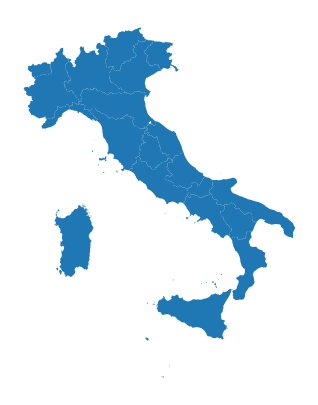

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')


italy = gpd.read_file('../resources/reg2011_g.shp')
italy.plot(figsize=(5, 5))
plt.axis("off")
plt.show()


In [3]:
regioni = ["Piemonte", "Valle d'Aosta / Vallée d'Aoste",
           "Lombardia", "Trentino Alto Adige / Südtirol",
           "Veneto", "Friuli-Venezia Giulia", "Liguria",
           "Emilia-Romagna", "Toscana", "Umbria", "Marche",
           "Lazio", "Abruzzo", "Molise", "Campania", "Puglia",
           "Basilicata", "Calabria", "Sicilia", "Sardegna"]

italy["NOME_REG"] = regioni
italy.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,Valle d'Aosta / Vallée d'Aoste,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,Trentino Alto Adige / Südtirol,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."


In [4]:
df = pd.read_csv("../data/fenomeno/stereotipi/Accordo o accettabilità di almeno uno stereotipo - reg. (2018).csv")
df = df[["Territorio", "SEXISTAT1", "Stereotipi sui ruoli di genere, comportamenti nella coppia", "Value"]]
df.head()

,Territorio,SEXISTAT1,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Value
0,Italia,M,almeno uno stereotipo sui ruoli tradizionali d...,58.8
1,Italia,M,almeno uno stereotipo sulla violenza sessuale,57.5
2,Italia,M,almeno un comportamento nella coppia,27.3
3,Italia,F,almeno uno stereotipo sui ruoli tradizionali d...,58.8
4,Italia,F,almeno uno stereotipo sulla violenza sessuale,51.7


In [5]:

# territori = ["Nord-ovest", "Nord-est", "Centr", "Sud", "Isole"]
# istat_territori = df[(np.isin(df["Territorio"], territori)) & (df["SEXISTAT1"] == "T")]
# avg_istat_territori = pd.DataFrame(istat_territori.groupby(['Territorio','Stereotipi sui ruoli di genere, comportamenti nella coppia']).mean()["Value"])

istat_regioni = df[(np.isin(df["Territorio"], regioni)) & (df["SEXISTAT1"] == "T")]

example = istat_regioni.groupby(["Stereotipi sui ruoli di genere, comportamenti nella coppia", "Territorio"]).mean()#[["Territorio", "Grado di accettabilità", "Value"]]
example.head()

Value
Stereotipi sui ruoli di genere, comportamenti n... Territorio           
almeno un comportamento nella coppia               Abruzzo          38.1
                                                   Basilicata       35.2
                                                   Calabria         31.5
                                                   Campania         35.0
                                                   Emilia-Romagna   22.2

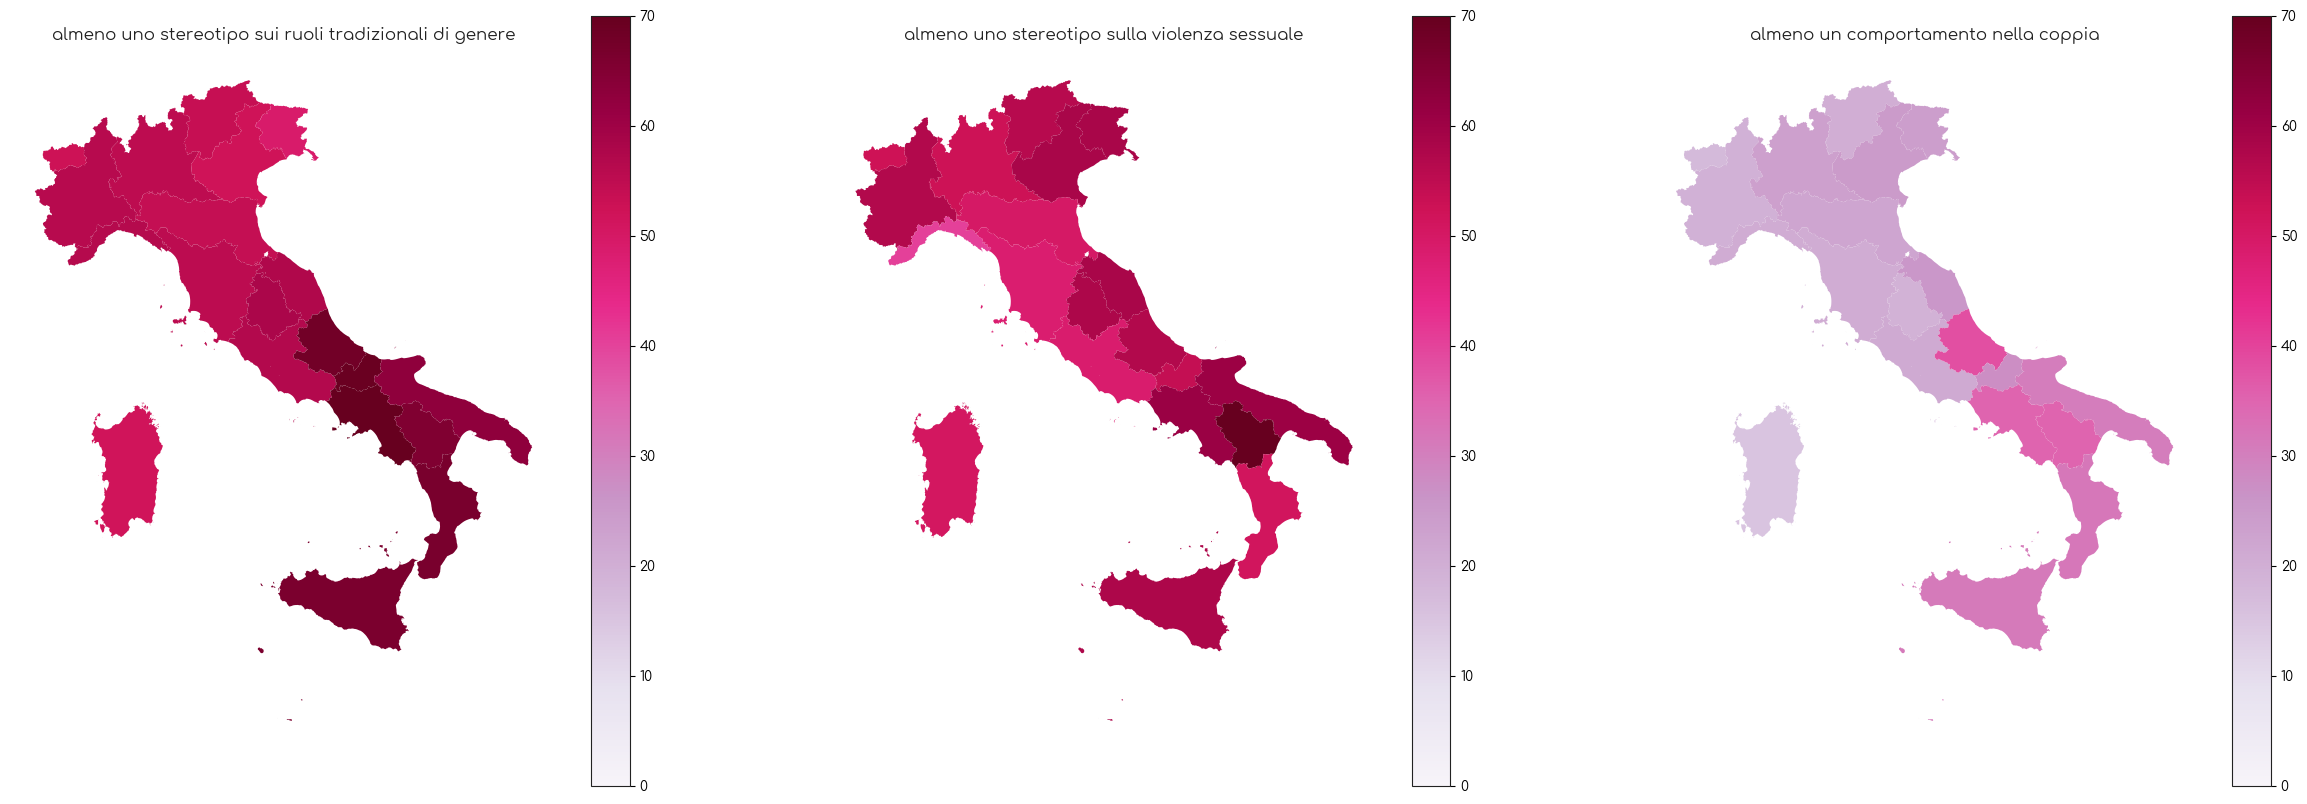

<Figure size 1000x1000 with 0 Axes>

In [25]:
fig, ax = plt.subplots(figsize=(30,10))

for i, categoria in enumerate(df["Stereotipi sui ruoli di genere, comportamenti nella coppia"].unique()):

    example_c = example.loc[categoria]
    merge = italy.merge(example_c, left_on="NOME_REG", right_on="Territorio")
    
    ax =  plt.subplot(1, 3, i+1)

    one = merge.plot(
        column="Value",
        cmap='PuRd',
        ax=ax,
        legend=True,
        vmin=0,
        vmax=70,
        figsize=(8,8)
    )

    plt.axis("off")
    plt.title("{:s}".format(categoria), fontsize=12)

# import matplotlib as mpl
    
# cmap = mpl.cm.PuRd
# sm = plt.cm.ScalarMappable(norm=plt.Normalize(0,1), cmap=cmap)
# sm._A = []
# fig.colorbar(sm, orientation='horizontal', format="%d%%", ticks=np.arange(8)*10,boundaries=(0,70))

plt.show()

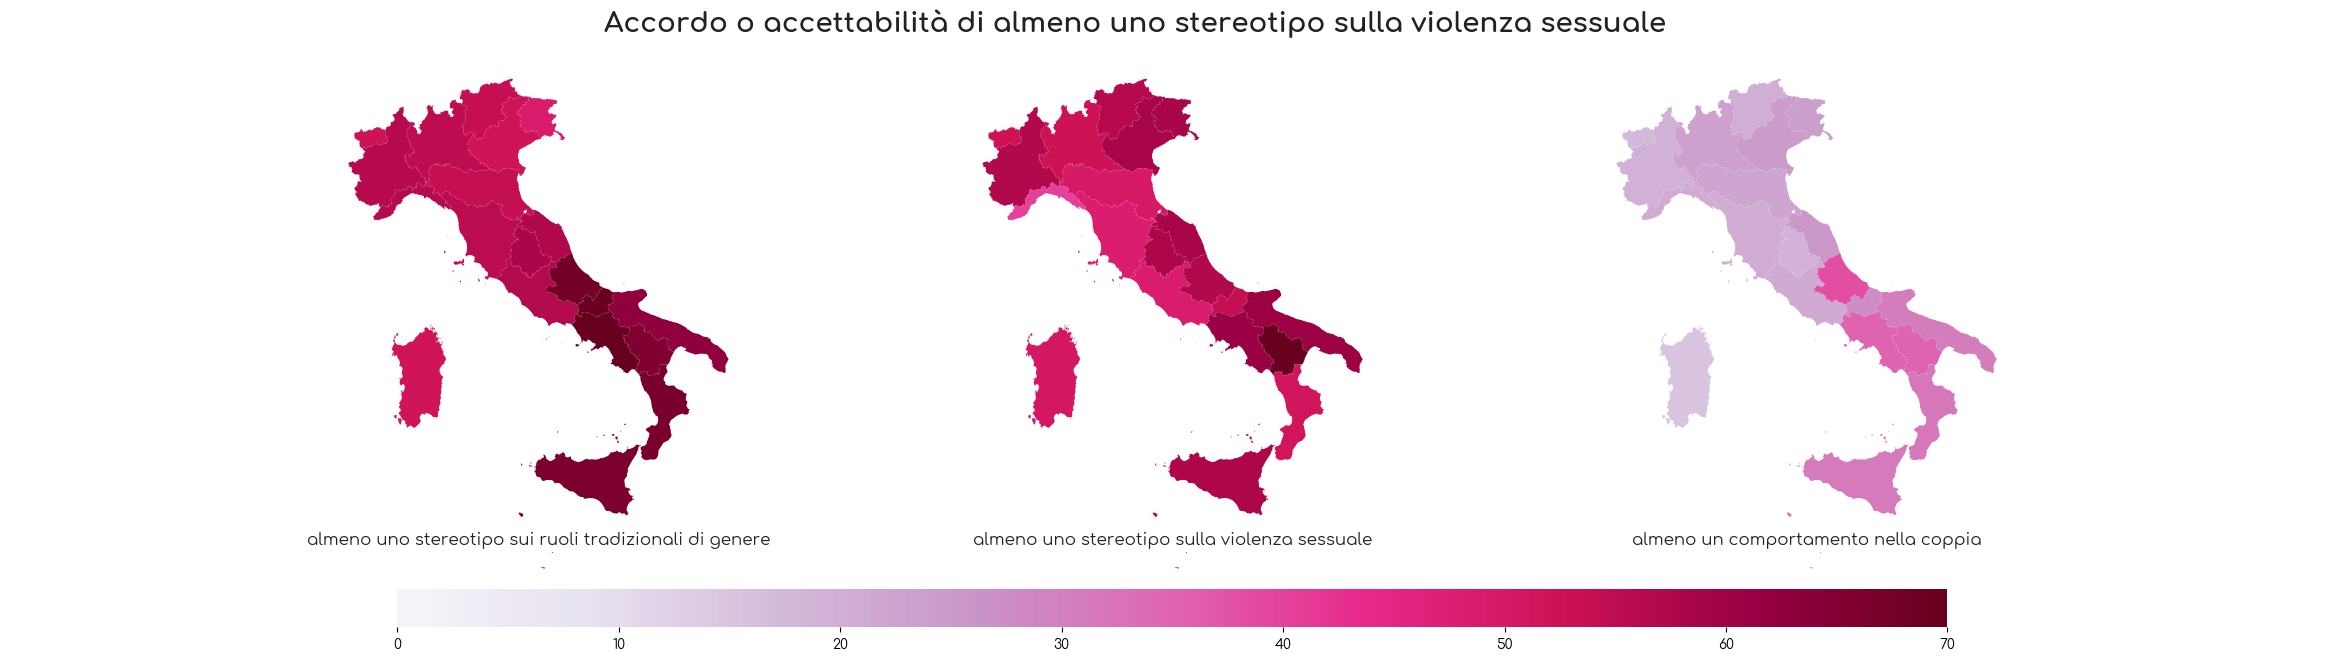

In [50]:
fig, axes = plt.subplots(figsize=(30,10), nrows=1, ncols=3)

for i, categoria in enumerate(df["Stereotipi sui ruoli di genere, comportamenti nella coppia"].unique()):

    example_c = example.loc[categoria]
    merge = italy.merge(example_c, left_on="NOME_REG", right_on="Territorio")
    
    ax = axes[i]

    one = merge.plot(
        column="Value",
        cmap='PuRd',
        ax=ax,
        legend=False,
        vmin=0,
        vmax=70,
        figsize=(8,8)
    )

    ax.axis("off")
    ax.set_title("{:s}".format(categoria), fontsize=12, y=0.075)

# create new fig and axes to get a throwaway
fig2, ax2 = plt.subplots()

# creating and showing colorbar on throwaway fig and ax  
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# value of img is returned to plot colorbar
img = ax2.imshow(gradient, cmap='PuRd')

# closing the figure so it doesn't show
plt.close()

fig.subplots_adjust(wspace=-0.4)
cbar = fig.colorbar(img, ax=axes.ravel().tolist(), orientation='horizontal', format='%d%%', aspect=60)
cbar.ax.set_xticks(np.arange(8)/7)
cbar.ax.set_xticklabels(np.arange(8)*10)
cbar.ax.set_aspect(0.025)
cbar.outline.set_alpha(0)

cbar_pos = cbar.ax.get_position()
cbar_pos.y0 += 0.12
cbar_pos.y1 += 0.12
cbar.ax.set_position(cbar_pos)

plt.suptitle("Accordo o accettabilità di almeno uno stereotipo sulla violenza sessuale", fontsize=20, weight='bold', y=0.925)
plt.show()
